### Transformada de Fourier

La transformada de Fourier es una tranformación que nos permite calcular la contribución de cada frecuencia proveniente de una señal. La expresión matemática para una dimensión es la siguiente:

\begin{equation*}
F(\mu) = \int\limits_{-\infty}^{ \infty} f(x)e^{-2\pi i \mu x} dx
\end{equation*}

donde $\mu$ representa las frecuencias. Puede demostrarse que dada una función $f(\mu)$ podemos obtener la función $f(x)$. La expresión de dicha transformación es:

\begin{equation*}
f(x) = \int\limits_{-\infty}^{\infty} F(\mu) e^{2\pi i \mu x}dx
\end{equation*}

Entrando en esto, a la función $F(\mu)$ se le denomina como espectro de Fourier de la señal $f(x)$, y a $|F(\mu)|^2$ se le denomica espectro de potencias de $f(x)$

En el caso en el cual tengamos una señal dependiente de dos variables, entonces se tiene que la transformada de Fourier es la siguiente:

\begin{equation*}
F(\mu,\nu) = \int\limits_{-\infty}^{\infty} \int\limits_{-\infty}^{\infty} f(x,y) e^{-2\pi i\left(\mu x + \nu y \right)}
\end{equation*}

Esta manera de calcular la transformada de Fourier es util para cuando lo realizamos de manera análitica, pero en señales analogicas o imagenes el proceso puede llegar a ser tedioso, también deberiamos considerar que $f(x) y f(x,y)$ se consideran continuas, por lo que tendriamos que definir su análogo discreto. Por lo que, la transformada de Fourier discreta es la siguiente:

\begin{equation*}
F(\mu,\nu) = \frac{1}{MN} \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x,y)e^{-2\pi i \left(\frac{\mu x}{M}+ \frac{\nu y}{N} \right)}
\end{equation*}

Donde 

\begin{eqnarray*}
\mu &=0,1,...,M-1 \\
\nu &=0,1,...,N-1
\end{eqnarray*}

La implementación de este procesimiento puede englobarse en dos ciclos donde se evaluara la multiplicación de la función exponencial con argumento complejo y cada valor de la señal.
En Python, esto ya viene escrito en las librerias numpy y scipy, por lo que usaremos esas herramientas ya elaboradas.

El comando para usar esta función es la siguiente:
````

f = np.fft.fft2(image)


````
Con esto ya podemos obtener la transformada de Fourier discreta bidimensional.

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [17]:
class FFT_algorithm:
    def __init__(self, path_image, name_image):
        self.path_image = path_image
        self.name_image = name_image
        self.read_image()
        self.apply_FFT()

    def read_image(self):
        self.img = Image.open(self.path_image + self.name_image)

    def apply_FFT(self):
        f = np.fft.fft2(self.img)
        f = np.fft.fftshift(f)
        self.FFT_image = np.log(np.abs(f)) * 1000

    def plot_FFT_and_original(self):
        fig = plt.figure(figsize=(8, 8))
        axs = [fig.add_subplot(2, 2, i + 1) for i in range(4)]
        ax1, ax2, ax3, ax4 = axs
        plt.subplots_adjust(left=0,
                            bottom=0,
                            right=1,
                            top=1,
                            wspace=0,
                            hspace=0)
        self.plot_FFT(ax1, self.img, bar=False)
        self.plot_FFT(ax2, self.FFT_image)
        self.plot_FFT(ax3, self.FFT_image, hexagon=True)
        self.plot_FFT(ax4, self.FFT_image, hexagon=True, cmap="inferno_r")
        plt.subplots_adjust(top=0.978,
                            bottom=0.022,
                            left=0.025,
                            right=0.975,
                            hspace=0.0,
                            wspace=0.054)
        plt.show()

    def plot_FFT(self, ax, image, cmap="Greys_r", bar=True, hexagon=False):
        ax.axis("off")
        ax.set_aspect('equal')
        ax.imshow(image, cmap=cmap)
        if bar:
            ax.plot([6.5, 63.3], [247.4, 247.4], color="black", lw=4)
            ax.text(2, 238, "5  1nm$^{-1}$", fontsize=14)
        if hexagon:
            self.read_plot_hexagon(ax)

    def read_plot_hexagon(self, ax):
        x, y = np.loadtxt("Data/hexa.csv", delimiter=",", unpack=True)
        n = np.size(x)
        for i in range(n):
            j = i + 1
            if j == n:
                j = 0
            pos = [i, j]
            ax.plot(x[pos], y[pos], lw=3, color="black")

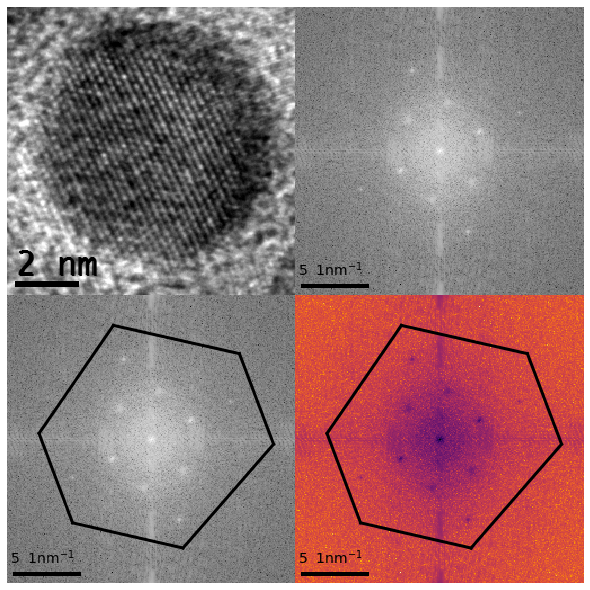

In [18]:
inputs = {
    "Image path": "",
    "Image name": "Imagen.tif",
}
FFT = FFT_algorithm(
    inputs["Image path"],
    inputs["Image name"],
)
FFT.plot_FFT_and_original()

#### Extra

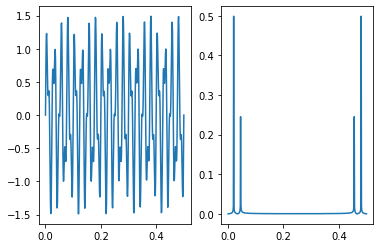

In [45]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 0.5, 500)
f=np.sin(40 * 2 * np.pi * x) + 0.5 * np.sin(90 * 2 * np.pi * x)
FFT = np.abs(np.fft.fft(f))
freq = np.fft.fftfreq(x.size,d=x[0]-x[1])
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, f)
ax2.plot(x, FFT/x.size)
plt.show()